In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/Users/azulmakk/Universidad/Datasets/Predictiva/dataset.csv')

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['track_id'], axis=1)

In [5]:
scaler = StandardScaler()
numeric_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
import pandas as pd

def agregar_estadisticas_por_grupo(df, columna, columna_grupo):

    max_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('max')
    min_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('min')
    median_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('median')
    mean_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('mean')

    df[columna + '_max_X_' + columna_grupo] = max_columna_por_grupo
    df[columna + '_min_X_' + columna_grupo] = min_columna_por_grupo
    df[columna + '_median_X_' + columna_grupo] = median_columna_por_grupo
    df[columna + '_mean_' + columna_grupo] = mean_columna_por_grupo

    return df

In [7]:
df = agregar_estadisticas_por_grupo(df, 'energy', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'danceability', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'instrumentalness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'speechiness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'acousticness', 'track_genre')

In [8]:
df['EnergyXLiveness'] = df['energy'] * df['liveness']
df['acousticnessXinstrumentalness'] = df['acousticness'] * df['instrumentalness']
df['danceabilityXpopularity'] = df['danceability'] * df['popularity']
df['danceabilityXacousticness'] = df['danceability'] * df['acousticness']
df['energyXpopularity'] = df['energy'] * df['popularity']

In [9]:
df['max_duration_by_artist'] = df.groupby('artists')['duration_ms'].transform('max')
df['min_duration_by_artist'] = df.groupby('artists')['duration_ms'].transform('min')
df['median_duration_by_artist'] = df.groupby('artists')['duration_ms'].transform('median')
mean_duration_all_artists = df['duration_ms'].mean()
df['max_duration_by_artist'].fillna(mean_duration_all_artists, inplace=True)
df['min_duration_by_artist'].fillna(mean_duration_all_artists, inplace=True)
df['median_duration_by_artist'].fillna(mean_duration_all_artists, inplace=True)

In [10]:
columns_with_nas = df.columns[df.isna().any()].tolist()

if columns_with_nas:
    print("Columns with missing values:", columns_with_nas)
else:
    print("No missing values found in any column.")

# Las columnas con valores nulos son: ['artists', 'album_name', 'track_name']

Columns with missing values: ['artists', 'album_name', 'track_name']


In [11]:
def frequency_encoding(df, column):
    freq = df[column].value_counts(normalize=True).to_dict()
    df[column + '_freq_encoded'] = df[column].map(freq)
    return df

In [12]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
    le = LabelEncoder()
    encoded_data = le.fit_transform(data)
    return encoded_data

In [13]:
df['explicit'] = df['explicit'].astype(int)

In [14]:
df['promedio_explicit_por_artista'] = df.groupby('artists')['explicit'].transform('mean')
mean_explicit_all_artists = df['explicit'].mean()
df['promedio_explicit_por_artista'].fillna(mean_explicit_all_artists, inplace=True)

df['promedio_explicit_por_genero'] = df.groupby('track_genre')['explicit'].transform('mean')
mean_explicit_all_artists = df['explicit'].mean()
df['promedio_explicit_por_genero'].fillna(mean_explicit_all_artists, inplace=True)

In [15]:
df['track_genre_encoded'] = label_encoder(df['track_genre'])

print(df[['track_genre', 'track_genre_encoded']])
df = df.drop(['track_genre'], axis=1)

        track_genre  track_genre_encoded
0          acoustic                    0
1          acoustic                    0
2          acoustic                    0
3          acoustic                    0
4          acoustic                    0
...             ...                  ...
113995  world-music                  113
113996  world-music                  113
113997  world-music                  113
113998  world-music                  113
113999  world-music                  113

[114000 rows x 2 columns]


In [16]:
df['artists_encoded'] = label_encoder(df['artists'])

print(df[['artists', 'artists_encoded']])
df = df.drop(['artists'], axis=1)

                       artists  artists_encoded
0                  Gen Hoshino            10357
1                 Ben Woodward             3287
2       Ingrid Michaelson;ZAYN            12397
3                 Kina Grannis            14839
4             Chord Overstreet             5255
...                        ...              ...
113995           Rainy Lullaby            22486
113996           Rainy Lullaby            22486
113997           Cesária Evora             4952
113998        Michael W. Smith            18534
113999           Cesária Evora             4952

[114000 rows x 2 columns]


In [17]:
df.drop(['track_name', 'album_name'], axis=1, inplace=True)

In [18]:
columns_with_nan = df.columns[df.isna().any()].tolist()
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with NaN values:", columns_with_nan)
print(object_columns)

Columns with NaN values: []
Index([], dtype='object')


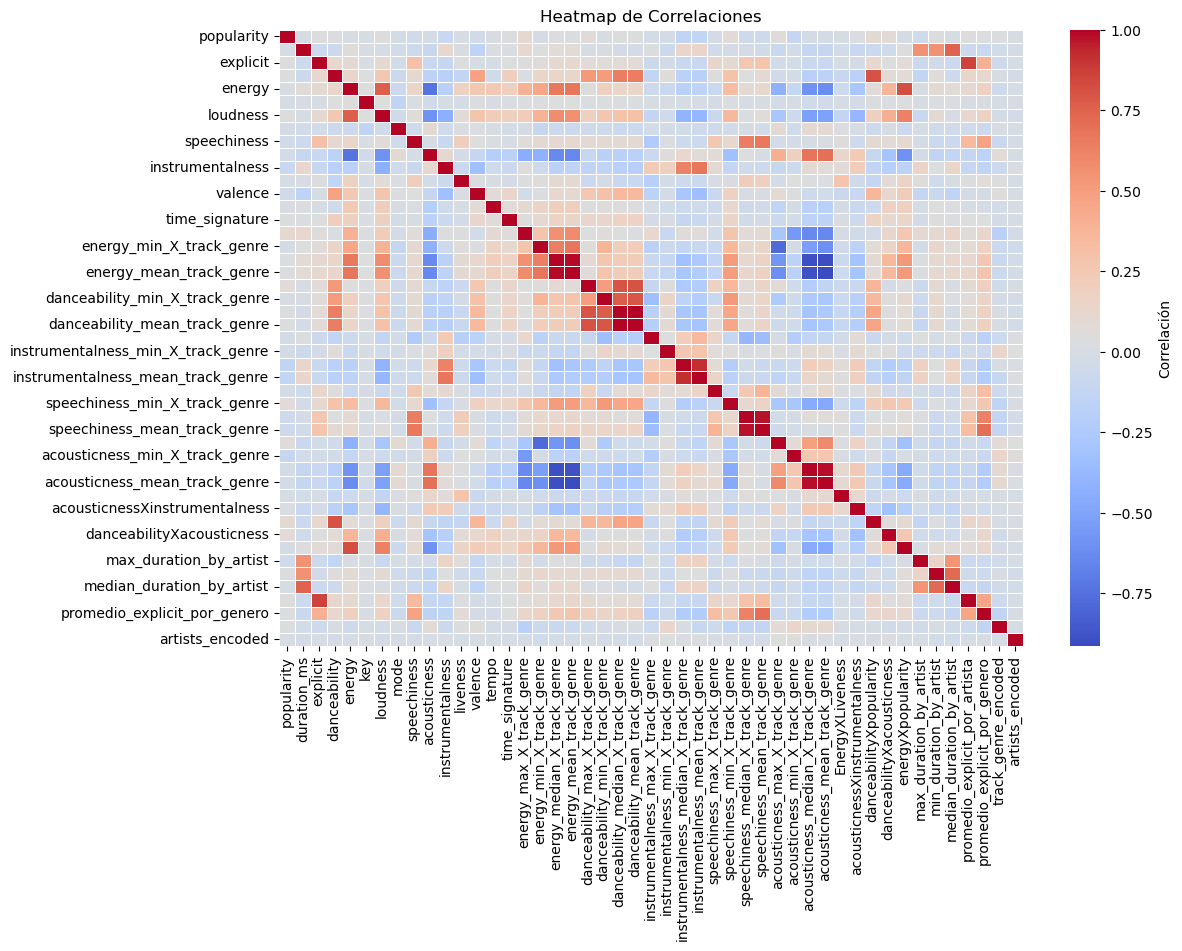

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlación'})
plt.title('Heatmap de Correlaciones')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = df.drop('explicit', axis=1)
y = df['explicit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Random Forest

In [21]:
rf_classifier = RandomForestClassifier(random_state=13)
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_rf_classifier = RandomForestClassifier(random_state=13, **best_params)
best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')

KeyboardInterrupt: 

# Gradient Boosting

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=13)
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_gb_classifier = GradientBoostingClassifier(random_state=13, **best_params)
best_gb_classifier.fit(X_train, y_train)
y_pred_gb = best_gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Best Hyperparameters: {best_params}')
print(f'Gradient Boosting Accuracy: {accuracy_gb}')


Gradient Boosting Accuracy: 0.9792982456140351


# Support Vector Machine (SVM)

In [ ]:
svm_linear_classifier = SVC(kernel='linear', random_state=13)
svm_rbf_classifier = SVC(kernel='rbf', random_state=13)
svm_poly_classifier = SVC(kernel='poly', degree=3, random_state=13)

svm_linear_classifier.fit(X_train, y_train)
svm_rbf_classifier.fit(X_train, y_train)
svm_poly_classifier.fit(X_train, y_train)

y_pred_linear = svm_linear_classifier.predict(X_test)
y_pred_rbf = svm_rbf_classifier.predict(X_test)
y_pred_poly = svm_poly_classifier.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print(f'SVM Linear Kernel Accuracy: {accuracy_linear}')
print(f'SVM RBF Kernel Accuracy: {accuracy_rbf}')
print(f'SVM Polynomial Kernel Accuracy: {accuracy_poly}')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn}')

# KNN

In [ ]:
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 50))
}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)
y_pred_optimal = best_knn_classifier.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)

print(f'Best Hyperparameters: {best_params}')
print(f'k-NN Accuracy with Optimal Neighbors: {accuracy_optimal}')